# Проект 5 Игровые платформы

# Описание проекта

Работа выполняется для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Исследуемые данные - до 2016 года. Представим, что сейчас декабрь 2016 г., необходимо спланировать кампанию на 2017-й.

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## 1. Загрузка и изучение датасета

In [2]:
games = pd.read_csv('games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Посмотрим процент пропущенных значений в столбцах датасета
games.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [5]:
#Посмотрим типы данных в столбцах
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

## 2. Подготовка данных

In [6]:
col = games.columns
col

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
#Приведем названия столбцов к нижнему регистру
col = col.str.lower()
games.columns = col
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [8]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
#Заменим отсутствующие названия игр на unknown, возможно потом они пригодятся
games['name'] = games['name'].fillna(value = 'unknown')

In [10]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
#Удалим пропущенные значения в столбце year_of_release
games.dropna(subset = ['year_of_release'], inplace= True)
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [12]:
#Проверим все ли удалились
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [13]:
#Переведем в тип целое число
games['year_of_release'] = games['year_of_release'].astype('int')

In [14]:
#Проверим нулевые значения в столбце genre
games[games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это опять те же самые 2 записи, в которые не хватало названия игры. Думаю, можно смело их удалить.

In [15]:
games.dropna(subset = ['genre'], inplace = True)

In [16]:
#Для оптимизации памяти переведем значения столбцов platform и genre в тип данных категория
games['genre'] = games['genre'].astype('category')

In [17]:
#Заменим пустые значения столбца rating на none и переведем в тип данных категория
games['rating'] = games['rating'].fillna(value = 'none')
games['rating'] = games['rating'].astype('category')

In [18]:
games['rating'].value_counts()

none    6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [19]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


По идее, tbd означает to be determined (или decided) - т.е. ожидается. Но встречается оно в играх не зависимо от года выпуска, поэтому считаю можно данные значения заменить на NaN, чтобы они не влияли на расчеты.

Тогда данный столбец можно перевести в тип данных число.

In [20]:
#Функция замены значений tbd на NaN
def user_score(data):
    if data == 'tbd':
        data = np.NaN
    return data

In [21]:
#Применим функцию к столбцу user_score
games['user_score'] = games['user_score'].apply(user_score)

In [22]:
games['user_score'] = games['user_score'].astype('float')

In [23]:
#Посчитаем суммарные продажи по всем регионам и запишем их в отдельный столбец
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [24]:
games.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9523,Dreamworks 2-in-1 Party Pack,DS,2010,Misc,0.12,0.00,0.0,0.01,NaN,NaN,E,0.13
7231,Pinball Hall of Fame: The Williams Collection,PS3,2009,Misc,0.20,0.00,0.0,0.02,82.0,7.9,E10+,0.22
6243,FIFA Soccer 07,X360,2006,Sports,0.24,0.01,0.0,0.02,NaN,NaN,none,0.27


In [25]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  object  
 2   year_of_release  16444 non-null  int32   
 3   genre            16444 non-null  category
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score     7983 non-null   float64 
 9   user_score       7463 non-null   float64 
 10  rating           16444 non-null  category
 11  total_sales      16444 non-null  float64 
dtypes: category(2), float64(7), int32(1), object(2)
memory usage: 1.3+ MB


Каких-то закономерностей в пропущенных значениях не выявлено. Возможная причина их появления - так как собраны данные за разные годы, возможно из разных источников, формы получения данных имели разный формат, некоторые поля возможно отсутствовали или были необязательны к заполнению.

Заполнять пропуски средними величинами на данный момент не целесообразно.

Проведена замена значений в столбцах:
- name: удалены 2 записи с пустыми значениями
- year_of_release: пустые и нулевые значения заменены на 1961
- rating: пустые значения заменены на none
- user_score: значения tbd заменены на NaN

Произведена замена типа данных в столбцах:
- year_of_release: выделен год, тип значения - целое число
- rating: замена на категории  - с целью оптимизации, ограниченный набор значений
- user_score: замена на численное значение

## 3. Исследовательский анализ данных

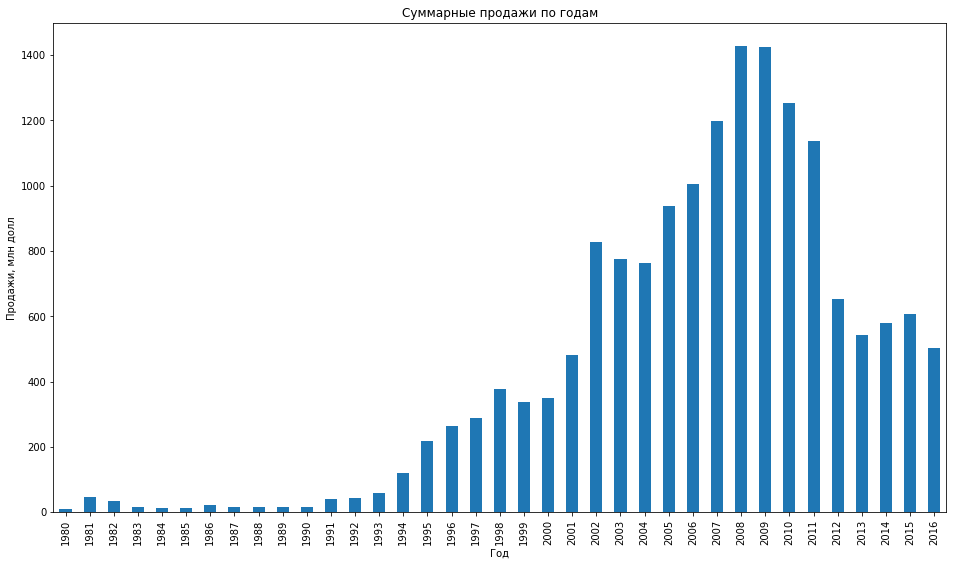

In [26]:
#Построим график суммарных продаж игр за все года
games.groupby('year_of_release')['name'].count().plot(kind = 'bar', figsize = (16,9), title = 'Суммарные продажи по годам')
plt.xlabel('Год')
plt.ylabel('Продажи, млн долл')
plt.show()

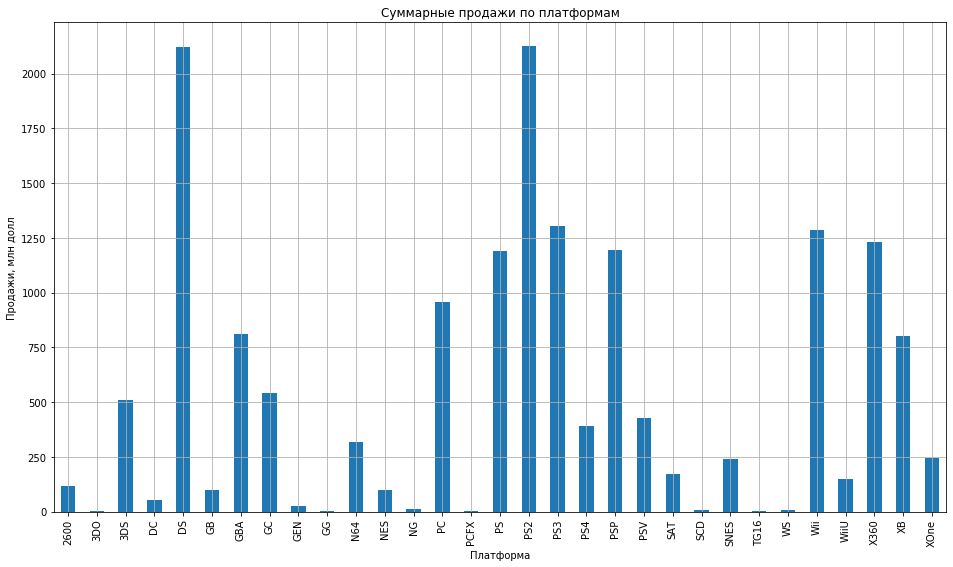

In [27]:
#Построим график суммарных продаж по платформам
games.groupby('platform')['name'].count().plot(kind = 'bar', figsize = (16, 9), grid = True,
                                              title = 'Суммарные продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн долл')
plt.show()

In [28]:
#Отсечем платформы, суммарные продажи которых меньше 500 млн
good_platforms = games.groupby('platform')['name'].count() > 500
good_platforms = good_platforms.to_frame().reset_index()
good_platforms = good_platforms[good_platforms['name'] == True]
good_platforms = good_platforms['platform'].to_list()

In [29]:
#Функция для определения наиболее продаваемых платформ (категории топ или низкий)
def top_sale (data):
    if data in good_platforms:
        return 'Top'
    else:
        return 'Low'

In [30]:
#Применим функцию к столбцу platform
games['platform_sale_category'] = games['platform'].apply(top_sale)

In [31]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_sale_category
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Top
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,none,40.24,Low
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Top
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Top
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,none,31.38,Low


In [32]:
#Возьмем только топовые платформы и игры выпуска моложе 1995 года
good_games_sales = games.query('platform_sale_category == "Top" and year_of_release >1995')
good_games_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_sale_category
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Top
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Top
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Top
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,Top
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,Top
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,none,0.01,Top
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,none,0.00,Top
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,none,0.01,Top
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,none,0.01,Top


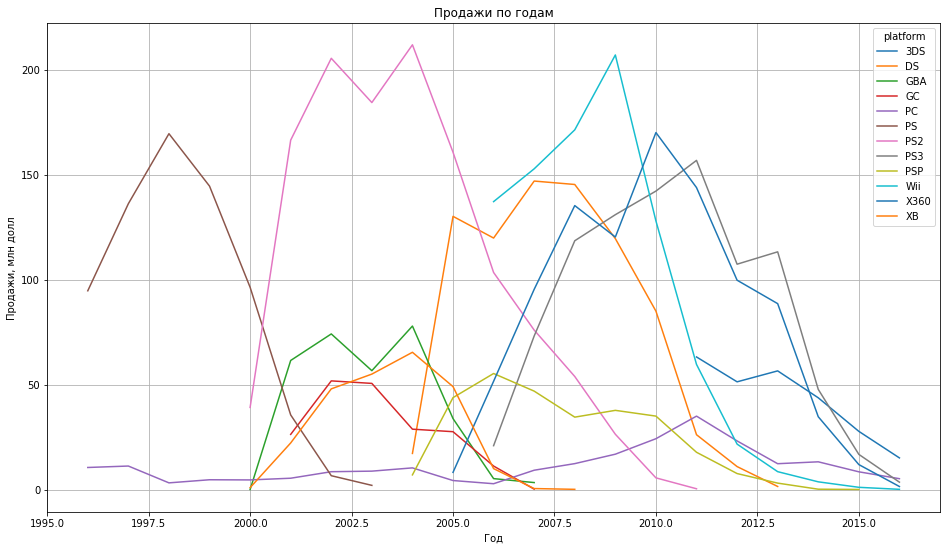

In [33]:
#Построим сводную таблицу и график продаж топовых платформ по годам
good_games_sales_pivot = good_games_sales.pivot_table(index = 'year_of_release', 
                                                 columns = 'platform',
                                                 values = 'total_sales', aggfunc = 'sum')
good_games_sales_pivot.plot(grid = True, figsize = (16, 9),
                           title = 'Продажи по годам')
plt.xlabel('Год')
plt.ylabel('Продажи, млн долл')
plt.show()

По данному графику можно определить, что средний срок игровой платформы составляет 7 лет.

Кстати, на этот график не попали более современные платформы, например PS4 и XOne, которые вышли в конце 2013 - начале 2014 года и не набрали достаточных продаж, чтобы встать в ряд с представленными на графике платформами. В данный момент (июнь 2020 года), жизненный цикл этих платформ как раз заканчивается, выходит следующее поколение, что как раз подтверждает вывод, что активный срок жизни игровой платформы порядка 7 лет.

PC - как игровая платформа - это стабильность. Хоть звезд с неба и не хватает.

In [34]:
#Возьмем срез по свежим играм, скажем с 2012 года
modern_games_sales = games.query('year_of_release >= 2012')

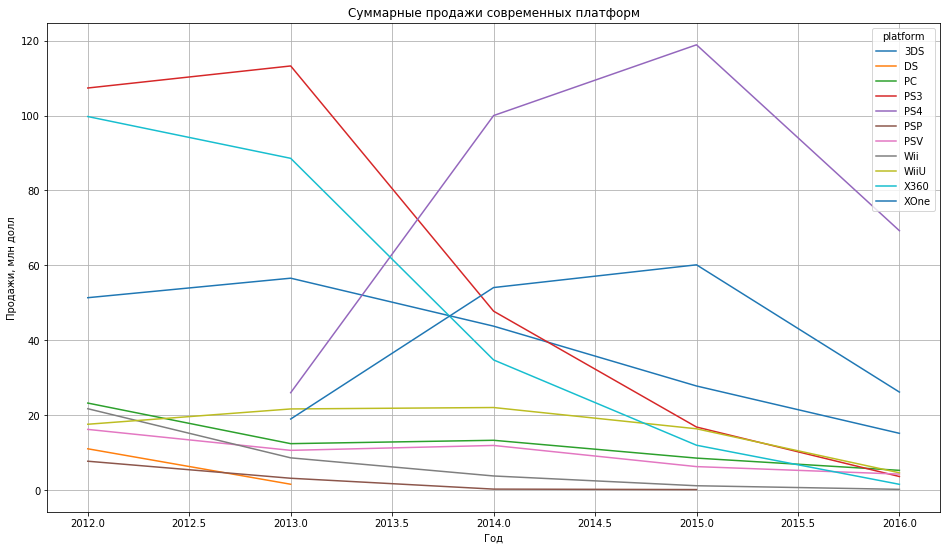

In [35]:
#Построим сводную таблицу и график продаж современных платформ по годам
modern_games_sales_pivot = modern_games_sales.pivot_table(index = 'year_of_release', 
                                                 columns = 'platform',
                                                 values = 'total_sales', aggfunc = 'sum')
modern_games_sales_pivot.plot(grid = True, figsize = (16, 9),
                             title = 'Cуммарные продажи современных платформ')
plt.xlabel('Год')
plt.ylabel('Продажи, млн долл')
plt.show()

Предполагаю, что за 2016 год мы имеем данные не полные.

В любом случае, более-менее положительная динамика по продажам только у 2-х современных платформ, PS4 и ХOne. На них и необходимо делать ставку.

Продажи игр на PC сохраняют свою стабильность на протяжении многих лет, хотя они раз в 5 ниже чем у топовых игровых платформ.

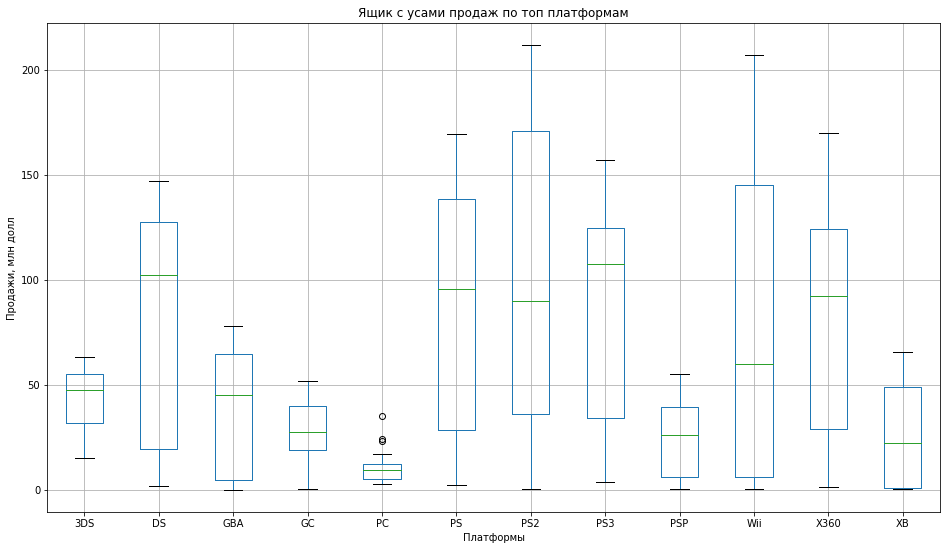

In [36]:
#Построим график "ящик с усами" по топ платформам
good_games_sales_pivot.boxplot(figsize = (16,9))
plt.title('Ящик с усами продаж по топ платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи, млн долл')
plt.show()

Из графика видно, что есть несколько лидеров по муммарным продажам - это PS2 (хотя вся серия PS хорошо продается) и Wii.

Есть и явные аутсайдеры - это 3DS, PSP, GC и PC.

Средние суммарные продажи в районе 100 млн у нескольких игровых платформ: DS, все семейство PS, X360. В 2 раза ниже - уровень 50 млн - это 3DS, GBA, Wii. Остальные платформы не дотягивают до этого уровня.

In [37]:
#Выделим игры только для Wii
wii_games_sales = good_games_sales[good_games_sales['platform'] == 'Wii']
wii_games_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_sale_category
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Top
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Top
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Top
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,Top
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,Top


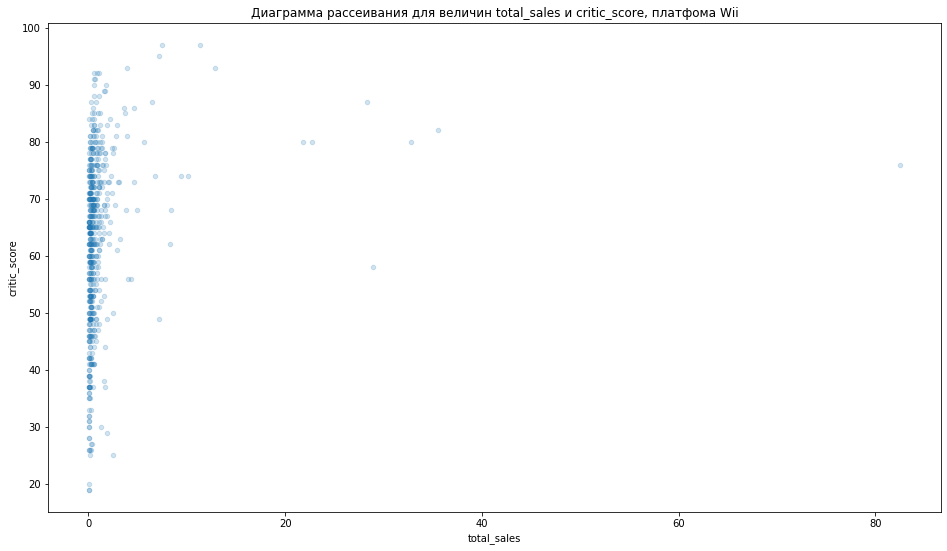

In [38]:
#Построим диаграмму рассеивания для величин total_sales и critic_score
wii_games_sales.plot(x = 'total_sales', y = 'critic_score', kind = 'scatter', figsize = (16, 9), alpha = 0.2,
                    title = 'Диаграмма рассеивания для величин total_sales и critic_score, платфома Wii')
plt.show()

In [39]:
#Для подтверждения посмотрим на коэффициент корелляции Пирсона
wii_games_sales['total_sales'].corr(wii_games_sales['critic_score'])

0.17790728577594914

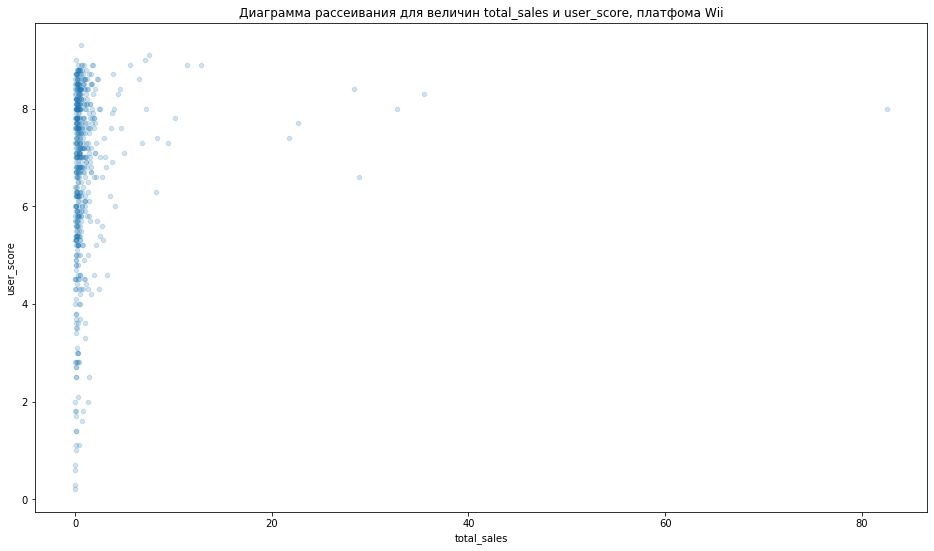

In [40]:
#Диаграмма рассеивания для величин total_sales и user_score
wii_games_sales.plot(x = 'total_sales', y = 'user_score', kind = 'scatter', figsize = (16, 9), alpha = 0.2,
                    title = 'Диаграмма рассеивания для величин total_sales и user_score, платфома Wii')
plt.show()

In [41]:
wii_games_sales['total_sales'].corr(wii_games_sales['user_score'])

0.11283121360773782

In [42]:
#Выделим игры для ps2,построим диаграммы рассеивания и определим коэффициент Пирсона
ps2_games_sales = good_games_sales[good_games_sales['platform'] == 'PS2']

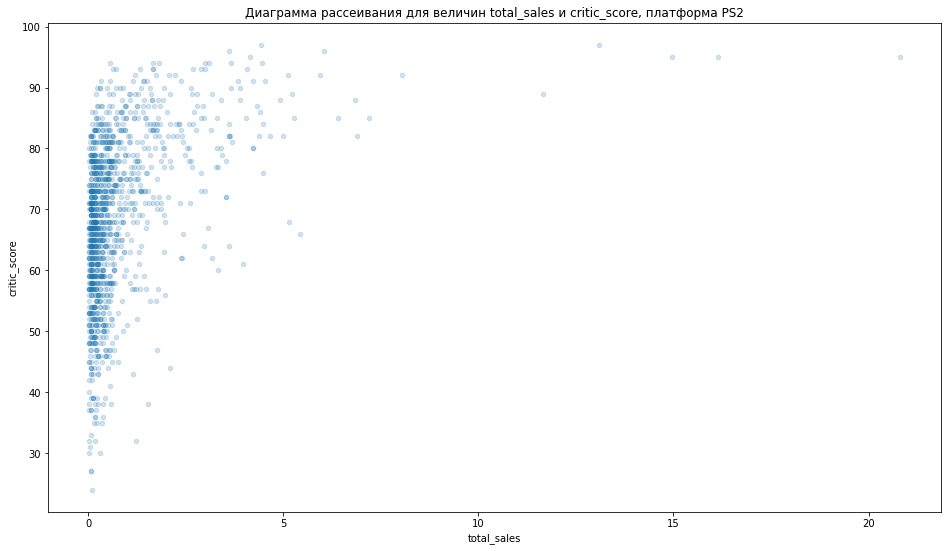

In [43]:
ps2_games_sales.plot(x = 'total_sales', y = 'critic_score', kind = 'scatter', figsize = (16, 9), alpha = 0.2,
                    title = 'Диаграмма рассеивания для величин total_sales и critic_score, платформа PS2')
plt.show()

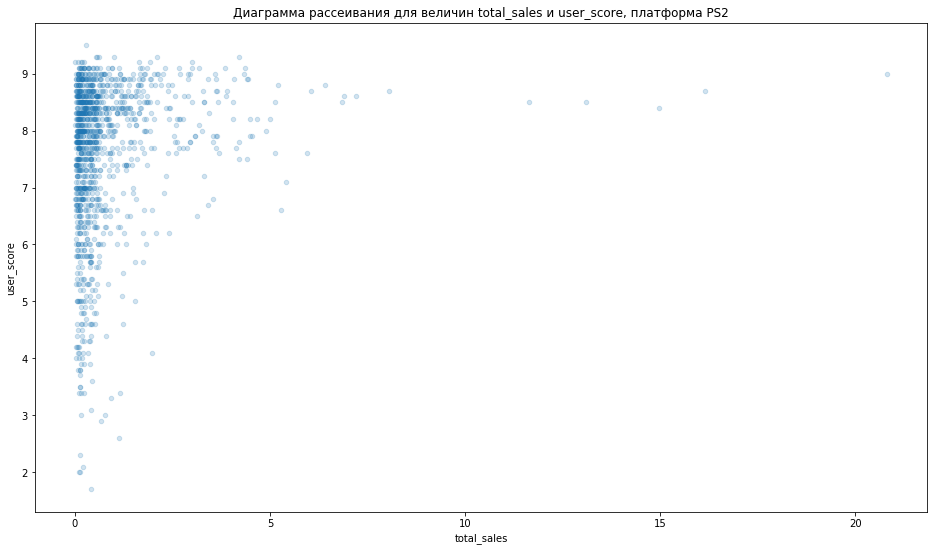

In [44]:
ps2_games_sales.plot(x = 'total_sales', y = 'user_score', kind = 'scatter', figsize = (16, 9), alpha = 0.2,
                    title = 'Диаграмма рассеивания для величин total_sales и user_score, платформа PS2')
plt.show()

In [45]:
ps2_games_sales['total_sales'].corr(ps2_games_sales['critic_score'])

0.39253647544509035

In [46]:
ps2_games_sales['total_sales'].corr(ps2_games_sales['user_score'])

0.17505502770383727

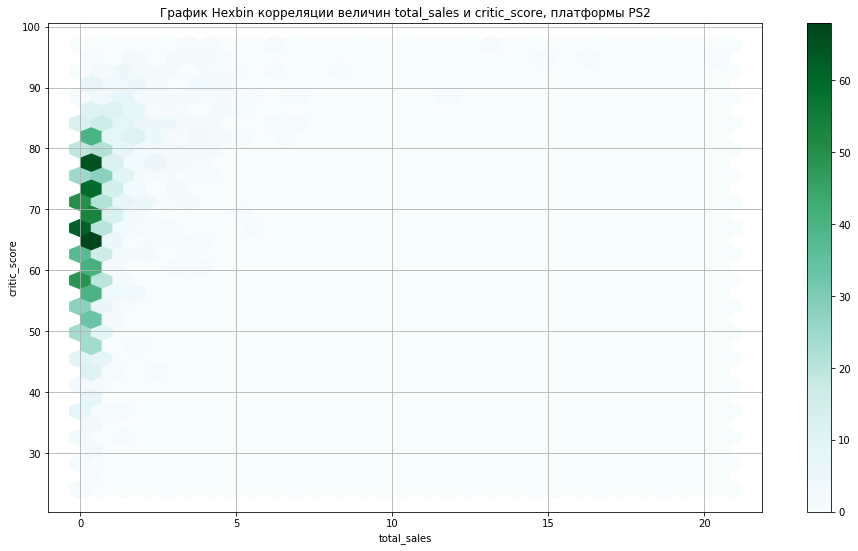

In [47]:
#Для большей визуализации можно построить графики hexbin для отражения корреляции тех же величин
ps2_games_sales.plot(x = 'total_sales', y = 'critic_score', kind = 'hexbin', figsize = (16, 9), gridsize = 30,
                    sharex = False, grid = True,
                    title = 'График Hexbin корреляции величин total_sales и critic_score, платформы PS2')
plt.show()

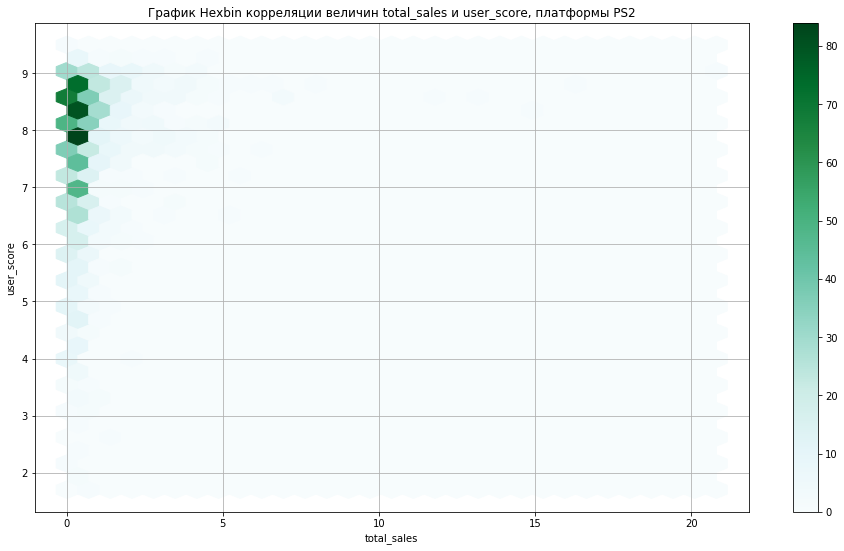

In [48]:
ps2_games_sales.plot(x = 'total_sales', y = 'user_score', kind = 'hexbin', figsize = (16, 9), gridsize = 30,
                    sharex = False, grid = True,
                    title = 'График Hexbin корреляции величин total_sales и user_score, платформы PS2')
plt.show()

In [49]:
#Теперь из любопытства посмотрим отличаются ли параметры для игр платформы X360
x360_games_sales = good_games_sales[good_games_sales['platform'] == 'X360']

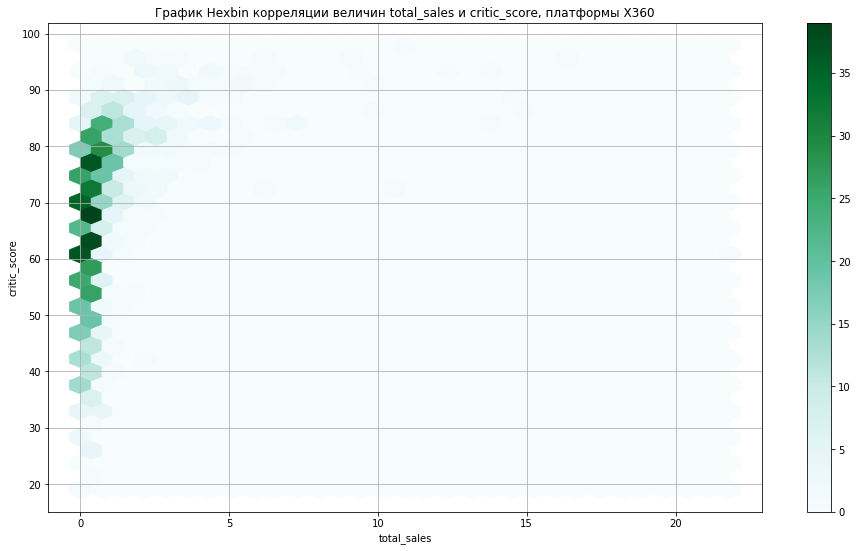

In [50]:
x360_games_sales.plot(x = 'total_sales', y = 'critic_score', kind = 'hexbin', figsize = (16, 9), gridsize = 30,
                    sharex = False, grid = True,
                     title = 'График Hexbin корреляции величин total_sales и critic_score, платформы X360')
plt.show()

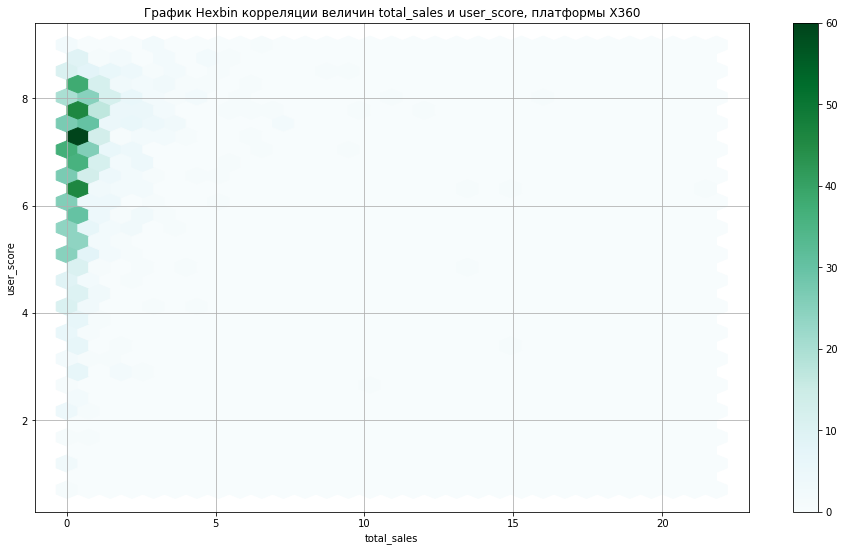

In [51]:
x360_games_sales.plot(x = 'total_sales', y = 'user_score', kind = 'hexbin', figsize = (16, 9), gridsize = 30,
                    sharex = False, grid = True,
                     title = 'График Hexbin корреляции величин total_sales и user_score, платформы X360')

plt.show()

In [52]:
x360_games_sales['total_sales'].corr(x360_games_sales['critic_score'])

0.39286589254006987

In [53]:
x360_games_sales['total_sales'].corr(x360_games_sales['user_score'])

0.11418661214018049

На суммарные продажи по платформам больше влияют оценки критиков, нежели пользователей.

Это можно понять: критик - профессионал, старается смотреть объективно, а точка зрения пользователей зачастую субъективна и оценка формируется исходя из того понравилась игра или нет.

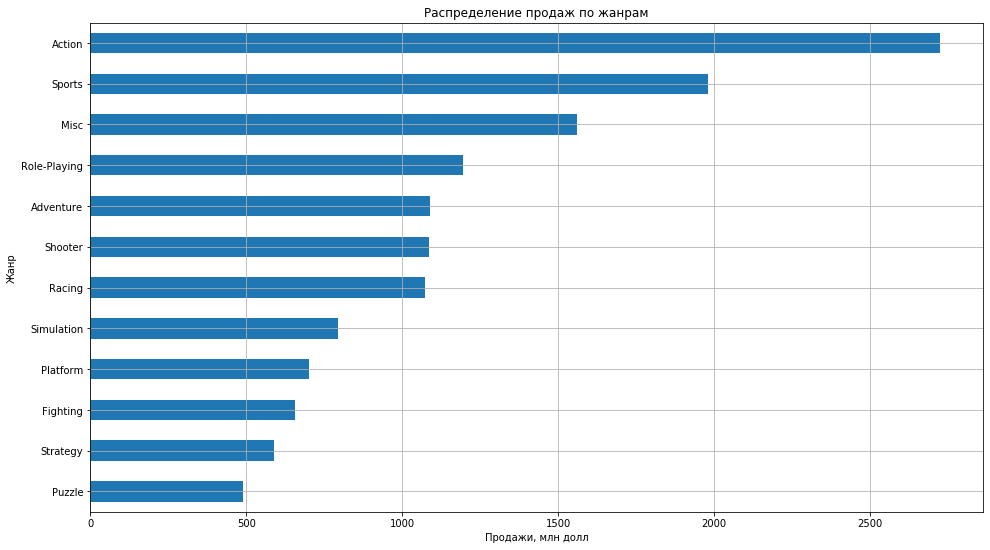

In [54]:
good_games_sales['genre'].value_counts(ascending = True).plot(kind = 'barh', figsize = (16, 9), grid = True, 
                                              title = 'Распределение продаж по жанрам')
plt.xlabel('Продажи, млн долл')
plt.ylabel('Жанр')
plt.show()

Самый популярный жанр - action, далее sports, RPG, adventure, shooter.

На последних местах - стратегии и пазлы.

Что подтверждает догадку, что в консольных играх больше работает спинной мозг чем головной. :)

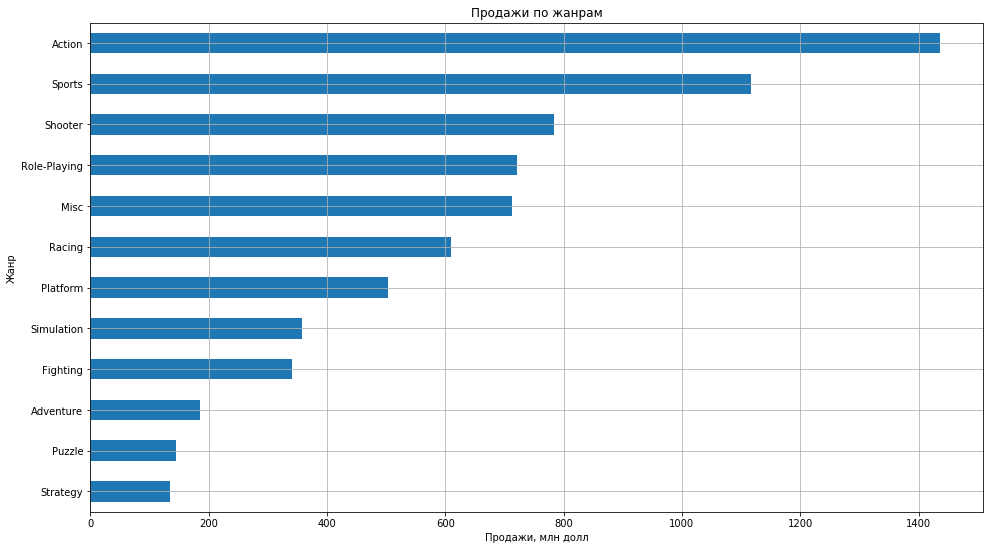

In [55]:
good_games_sales.groupby('genre')['total_sales'].sum().sort_values(ascending = True).plot(kind = 'barh', 
                                                                                          figsize = (16, 9), 
                                                                                          grid = True, 
                                                                                          title = 'Продажи по жанрам')
plt.xlabel('Продажи, млн долл')
plt.ylabel('Жанр')
plt.show()

По продажам лидируют: action, sports, shooter.

На последних местах - пазлы и стратегии.

Думающие люди меньше покупают игры, больше книги?

## 4. Составление портретов пользователей каждого региона

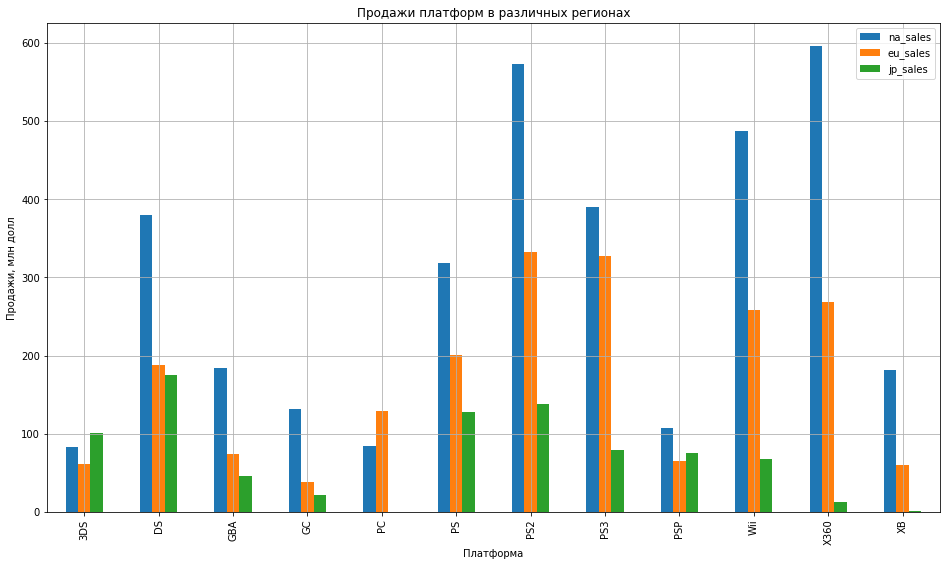

In [56]:
#Построим график продаж различных платформ в разных регионах
good_games_sales.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot(kind = 'bar', 
                                                                                      figsize = (16, 9), grid = True,
                                                                                     title = 'Продажи платформ в различных регионах')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн долл')
plt.show()

Американцы покупают игр на все платформы больше всех. Европейцы любят играть на PC, а японцы его вообще не признают. Также японцы проигнорировали семейство XBOX и любят портативные консоли 3DS, DS, PSP.

Самые популярные консоли:
- в Северной Америке: X360
- в Европе: PS2 и PS3
- в Японии: DS

In [57]:
#Отсортируем по платформам продажи в различных регионах
na_platform_sales = good_games_sales.groupby('platform')['na_sales'].sum().sort_values(ascending = False).to_frame().reset_index()
eu_platform_sales = good_games_sales.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).to_frame().reset_index()
jp_platform_sales = good_games_sales.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).to_frame().reset_index()

In [58]:
#И сведем все в одну таблицу для удобства
all_region_platform_top = na_platform_sales.merge(eu_platform_sales, how = 'left', left_index= True, right_index= True,
                                                 suffixes = [' - na', ' - eu'])
all_region_platform_top = all_region_platform_top.merge(jp_platform_sales, how = 'left', left_index= True, 
                                                        right_index= True)
all_region_platform_top5 = all_region_platform_top.head()
all_region_platform_top5

,platform - na,na_sales,platform - eu,eu_sales,platform,jp_sales
0,X360,595.74,PS2,332.63,DS,175.00
1,PS2,572.92,PS3,327.21,PS2,137.54
2,Wii,486.87,X360,268.32,PS,127.57
3,PS3,390.13,Wii,258.32,3DS,100.62
4,DS,380.31,PS,201.34,PS3,79.41


Американцы покупают игр на популярные платформы почти в 2 раза больше чем европейцы, а те в свою очередь в 2 раза чем японцы.

Топ 5 игровых платформ во всех регионах разные. Однако PS2 популярна во всех трех регионах.

В Америке почти одинаковы по популярности X360 и PS2, а в Европе PS2 и PS3.

Японцы любят только свои игровые платформы. Американские им совершенно не зашли. На первом месте в Японии игры для портативной платформы DS.

In [59]:
#Аналогично сгруппируем по жанрам и сведем данные по продажам во всех регионах
na_genre_sales = good_games_sales.groupby('genre')['na_sales'].sum().sort_values(ascending = False).to_frame().reset_index()
eu_genre_sales = good_games_sales.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).to_frame().reset_index()
jp_genre_sales = good_games_sales.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).to_frame().reset_index()
all_region_genre_top = na_genre_sales.merge(eu_genre_sales, how = 'left', left_index= True, right_index= True,
                                            suffixes = [' - na', ' - eu'])
all_region_genre_top = all_region_genre_top.merge(jp_genre_sales, how = 'left', left_index= True, right_index= True)
all_region_genre_top5 = all_region_genre_top.head()
all_region_genre_top5

,genre - na,na_sales,genre - eu,eu_sales,genre,jp_sales
0,Action,723.64,Action,428.81,Role-Playing,247.00
1,Sports,588.88,Sports,322.92,Action,125.93
2,Shooter,439.59,Shooter,243.53,Sports,86.34
3,Misc,364.55,Racing,204.29,Misc,85.42
4,Racing,301.55,Misc,193.89,Platform,53.18


У американцев и европейцев набор самых популярных игр одинаков: action, sports, shooter. Гонки тоже достаточно популярны.

Японцы больше всего любят RPG, есть даже такой жанр J-RPG, японский RPG для японского рынка. Американцы и европейцы в такие игры совсем не играют.

Также, японцы совсем не любят шутеры и гонки, зато любят платформеры, что можно объяснить тем, что самая популярная консоль у них портативная.

In [60]:
#Аналогично сгруппируем по рейтингу и сведем данные по продажам во всех регионах
na_rating_sales = good_games_sales.groupby('rating')['na_sales'].sum().sort_values(ascending = False).to_frame().reset_index()
eu_rating_sales = good_games_sales.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).to_frame().reset_index()
jp_rating_sales = good_games_sales.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).to_frame().reset_index()
all_region_rating_top = na_rating_sales.merge(eu_rating_sales, how = 'left', left_index= True, right_index= True,
                                              suffixes = [' - na', ' - eu'])
all_region_rating_top = all_region_rating_top.merge(jp_rating_sales, how = 'left', left_index= True, right_index= True)
all_region_rating_top5 = all_region_rating_top.head()
all_region_rating_top5

,rating - na,na_sales,rating - eu,eu_sales,rating,jp_sales
0,E,1224.74,E,653.02,none,424.26
1,T,714.54,none,404.42,E,189.75
2,M,649.38,M,393.69,T,138.30
3,none,608.85,T,392.95,M,55.87
4,E10+,314.30,E10+,160.12,E10+,36.41


На первых местах в Америке и Европе - игры с рейтингом E (everyone) - для всех, Т (teen) - для подростков, М (mature) - для взрослых. Это 3 основные рейтинга, присваиваемые ESRB играм, можно сказать, что он не влияет на продажи в отдельном регионе.

## 5. Проверка гипотез

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<b>Нулевая гипотеза</b> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  <i>(сформулирована так, чтобы использовать знак равенства)</i>

<b>Альтернативная гипотеза</b> Средние пользовательские рейтинги плтаформ Xbox One и PC различаются <i>(противоположная по смыслу нулевой гипотезе)</i>

In [61]:
#Выделим данные с пользовательским рейтингом игр платформы XOne и удалим пропущенные данные
xone = games.query('platform == "XOne"')
xone_user_score = xone['user_score'].dropna()

In [62]:
#Аналогично по платформе PC
pc = games.query('platform == "PC"')
pc_user_score = pc['user_score'].dropna()

In [63]:
alpha = 0.05 #критерий значимости
results = st.ttest_ind(xone_user_score, pc_user_score)
results.pvalue #p-значение

1.3037979620149106e-05

In [64]:
#Сравним полученное методом p-значение с критерием значимости
if results.pvalue < alpha :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


### 5.2 Средние пользовательские рейтинги жанров Action  и Sports  разные

<b>Нулевая гипотеза</b> Средние пользовательские рейтинги жанров Action и Sports одинаковые <i>(сформулирована так, чтобы использовать знак равенства)</i>

<b>Альтернативная гипотеза</b> Средние пользовательские рейтинги жанров Action и Sports различаются <i>(противоположная по смыслу нулевой гипотезе)</i>

In [65]:
#Выделим данные с пользовательским рейтингом игр жанра Action и удалим пропущенные данные
action = games.query('genre == "Action"')
action_user_score = action['user_score'].dropna()

In [66]:
#Аналогично по жанру Sports
sports = games.query('genre == "Sports"')
sports_user_score = sports['user_score'].dropna()

In [67]:
alpha = 0.05 #критерий значимости
results1 = st.ttest_ind(action_user_score, sports_user_score)
results1.pvalue #p-значение

0.06480928064420527

In [68]:
#Сравним полученное методом p-значение с критерием значимости
if results1.pvalue < alpha :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


### При проверке гипотез уровень статистической значимости выбран равным 0.05

## 6. Общие выводы

При планировании компании на следующий год считаю необходимо сосредоточить продажи и соответственно спланировать рекламный бюджет на следующие направления:

- Игровые платформы:
    - PS4
    - XBox One

Эти платформы современные, жизненный цикл их не истек (2017 год), можно ожидать если не роста, то сохранение уровня продаж.

- Жанры игр
    - Action
    - Sports
    - Shooter

Эти жанры продаются больше всего, соответственно на них и надо делать ставку при закупке игр для магазина и на рекламу.

- Регионы
    - Америка: Наиболее перспективный рынок с точки зрения продаж
    - Европа: Популярные платформы семейства PS, продолжают играть на PC (можно выделить небольшой рекламный бюджет)
    - Япония: Самый популярный жанр - RPG, на него делать ставку при продаже игр в Японии